In [15]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report


# YARA

In [16]:

# input_file = "../RAG_YARA/llama_yara.csv"
# output_file = "../RAG_YARA/llama_yara_new.csv"

# processed_rows = []

# # Open the CSV and read line by line
# with open(input_file, "r", encoding="utf-8") as file:
#     reader = csv.reader(file)  # Automatically handles commas
#     for row in reader:
#         # Ensure row has at least 4 columns
#         if len(row) >= 4:
#             package_name = row[0]
#             label = row[1]
#             llm_prediction = row[2]
#             explanation = ",".join(row[3:])  # Merge everything from 4th column onward
#             processed_rows.append([package_name, label, llm_prediction, explanation])

# # Convert processed data to a DataFrame
# df = pd.DataFrame(processed_rows, columns=["package_name", "label", "llm_prediction", "explanation"])

# # Save to CSV with quoted 4th column
# df.to_csv(output_file, index=False, quoting=csv.QUOTE_NONNUMERIC)  # Quote only the text column

# print(f"Processed file saved to: {output_file}")


In [17]:
yara_results = pd.read_csv('../RAG_YARA/llama_yara_new.csv')

In [18]:
yara_results.head()

,package_name,label,llm_prediction,explanation
0,appier-1.29.1,0,1,The file contains a base64 decoding function a...
1,rjsmin-1.2.1,0,0,The provided code snippet does not match any k...
2,names-0.3.0,0,0,The provided code snippet does not indicate an...
3,exponent_server_sdk-2.0.0,0,0,This package does not match the YARA rule's de...
4,ordered-set-4.1.0,0,0,The provided YARA rule is designed to detect r...


# GIT_ADVISORY

In [19]:

# input_file = "../RAG_YARA/llama_git_advisory.csv"
# output_file = "../RAG_YARA/llama_git_advisory_new.csv"

# processed_rows = []

# # Open the CSV and read line by line
# with open(input_file, "r", encoding="utf-8") as file:
#     reader = csv.reader(file)  # Automatically handles commas
#     for row in reader:
#         # Ensure row has at least 4 columns
#         if len(row) >= 4:
#             package_name = row[0]
#             label = row[1]
#             llm_prediction = row[2]
#             explanation = ",".join(row[3:])  # Merge everything from 4th column onward
#             processed_rows.append([package_name, label, llm_prediction, explanation])

# # Convert processed data to a DataFrame
# df = pd.DataFrame(processed_rows, columns=["package_name", "label", "llm_prediction", "explanation"])

# # Save to CSV with quoted 4th column
# df.to_csv(output_file, index=False, quoting=csv.QUOTE_NONNUMERIC)  # Quote only the text column

# print(f"Processed file saved to: {output_file}")


In [20]:
gitad_results = pd.read_csv("../RAG_YARA/llama_git_advisory_new.csv")

In [21]:
gitad_results.head()

,package_name,label,llm_prediction,explanation
0,tpstringhackedstudy-v6.3,1,1,This package uses the vulnerable setuptools ve...
1,sgp4-2.21,0,0,The code snippet does not exhibit any suspicio...
2,django-cleanup-6.0.0,0,0,Both advisories in the context relate to the Z...
3,pyre2-0.3.6,0,0,The code snippet from setup.py does not explic...
4,firstbasicpyapp-0.0.32,1,1,The package contains code that retrieves data ...


#Code snipet

In [22]:
code_snippet_results = pd.read_csv("../RAG_YARA/llama_malcode.csv")

#Analysis

In [23]:

# Ensure labels and predictions are properly formatted as integers
yara_results = yara_results[yara_results['label'].isin([0, 1])].copy()
gitad_results = gitad_results[gitad_results['label'].isin([0, 1, -1])].copy()
code_snippet_results = code_snippet_results[code_snippet_results['label'].isin([0, 1])].copy()

# Convert label and prediction columns to integers
yara_results['label'] = yara_results['label'].astype(int)
yara_results['llm_prediction'] = yara_results['llm_prediction'].astype(int)

gitad_results['label'] = gitad_results['label'].astype(int)
gitad_results['llm_prediction'] = gitad_results['llm_prediction'].astype(int)

code_snippet_results['label'] = code_snippet_results['label'].astype(int)
code_snippet_results['llm_prediction'] = code_snippet_results['llm_prediction'].astype(int)

In [25]:

# Compute evaluation metrics for yara
yara_accuracy = accuracy_score(yara_results['label'], yara_results['llm_prediction'])
yara_precision = precision_score(yara_results['label'], yara_results['llm_prediction'], average='binary')
yara_recall = recall_score(yara_results['label'], yara_results['llm_prediction'], average='binary')
yara_f1 = f1_score(yara_results['label'], yara_results['llm_prediction'], average='binary')

# Compute evaluation metrics for gitad including -1 category
gitad_accuracy = accuracy_score(gitad_results['label'], gitad_results['llm_prediction'])
gitad_precision = precision_score(gitad_results['label'], gitad_results['llm_prediction'], average='macro')
gitad_recall = recall_score(gitad_results['label'], gitad_results['llm_prediction'], average='macro')
gitad_f1 = f1_score(gitad_results['label'], gitad_results['llm_prediction'], average='macro')


code_snippet_accuracy = accuracy_score(code_snippet_results['label'], code_snippet_results['llm_prediction'])
code_snippet_precision = precision_score(code_snippet_results['label'], code_snippet_results['llm_prediction'], average='binary')
code_snippet_recall = recall_score(code_snippet_results['label'], code_snippet_results['llm_prediction'], average='binary')
code_snippet_f1 = f1_score(code_snippet_results['label'], code_snippet_results['llm_prediction'], average='binary')




c:\Users\Motunrayo Ibiyo\Documents\EDISS Masters Programme\MALRAG\MAL-RAG-master\MAL-RAG-master\.malvenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


yara Metrics:
Accuracy: 0.7212
Precision: 0.4841
Recall: 0.5507
F1 Score: 0.5153

gitad Metrics:
Accuracy: 0.6342
Precision: 0.4063
Recall: 0.4242
F1 Score: 0.4004
code_snippet Metrics:
Accuracy: 0.6039
Precision: 0.3519
Recall: 0.5788
F1 Score: 0.4377


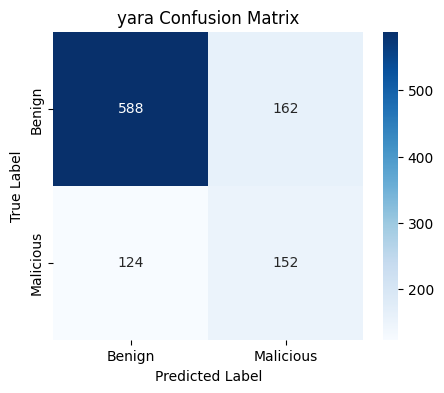

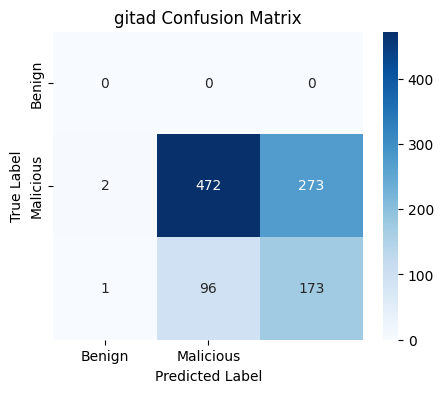

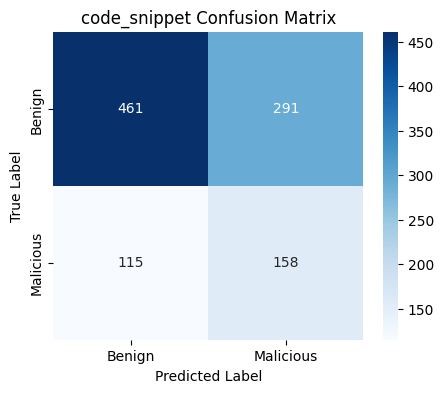

In [26]:


# Print results
print("yara Metrics:")
print(f"Accuracy: {yara_accuracy:.4f}")
print(f"Precision: {yara_precision:.4f}")
print(f"Recall: {yara_recall:.4f}")
print(f"F1 Score: {yara_f1:.4f}\n")

print("gitad Metrics:")
print(f"Accuracy: {gitad_accuracy:.4f}")
print(f"Precision: {gitad_precision:.4f}")
print(f"Recall: {gitad_recall:.4f}")
print(f"F1 Score: {gitad_f1:.4f}")

print("code_snippet Metrics:")
print(f"Accuracy: {code_snippet_accuracy:.4f}")
print(f"Precision: {code_snippet_precision:.4f}")   
print(f"Recall: {code_snippet_recall:.4f}")
print(f"F1 Score: {code_snippet_f1:.4f}")

# Plot confusion matrices
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Benign", "Malicious"], yticklabels=["Benign", "Malicious"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()

plot_confusion_matrix(yara_results['label'], yara_results['llm_prediction'], "yara Confusion Matrix")
plot_confusion_matrix(gitad_results['label'], gitad_results['llm_prediction'], "gitad Confusion Matrix")
plot_confusion_matrix(code_snippet_results['label'], code_snippet_results['llm_prediction'], "code_snippet Confusion Matrix")


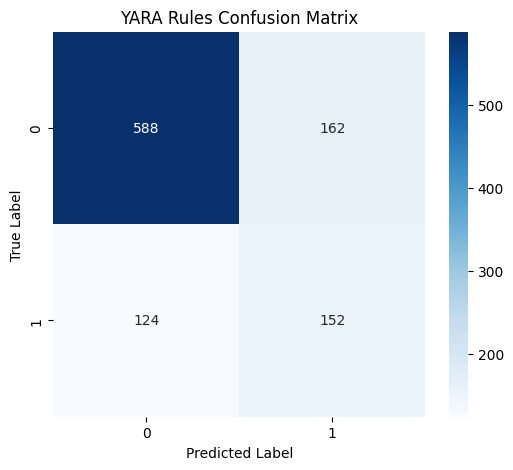

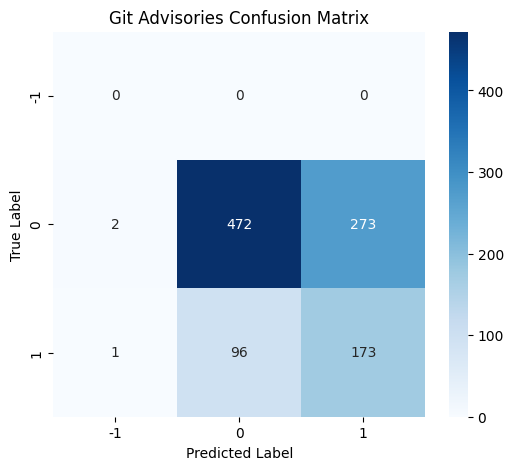

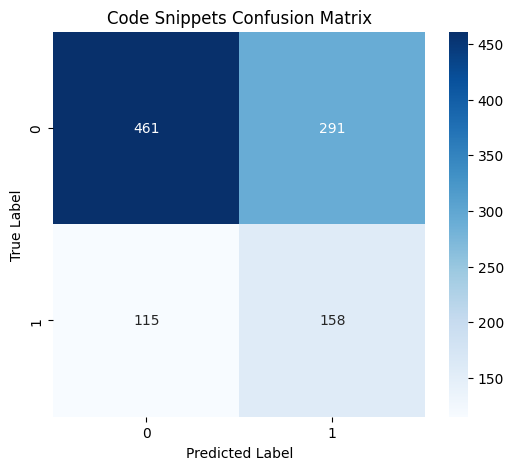

In [27]:
# Plot confusion matrices
def plot_confusion_matrix(y_true, y_pred, title, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()

plot_confusion_matrix(yara_results['label'], yara_results['llm_prediction'], "YARA Rules Confusion Matrix", labels=[0, 1])
plot_confusion_matrix(gitad_results['label'], gitad_results['llm_prediction'], "Git Advisories Confusion Matrix", labels=[-1, 0, 1])
plot_confusion_matrix(code_snippet_results['label'], code_snippet_results['llm_prediction'], "Code Snippets Confusion Matrix", labels=[0, 1])


In [29]:
# Compute evaluation metrics for yara
yara_report = classification_report(yara_results['label'], yara_results['llm_prediction'], output_dict=True)

# Compute evaluation metrics for gitad including -1 category
gitad_report = classification_report(gitad_results['label'], gitad_results['llm_prediction'], output_dict=True)

code_snippet_report = classification_report(code_snippet_results['label'], code_snippet_results['llm_prediction'], output_dict=True)

# Generate LaTeX table
# Generate LaTeX table
evaluation_metrics_df = pd.DataFrame({
    "Class": ["0 (Benign)", "1 (Malicious)", "Accuracy", "Balanced Accuracy"],
    "yara Precision": [f"{yara_report['0']['precision']:.2f}", f"{yara_report['1']['precision']:.2f}", f"{yara_report['accuracy']:.2f}", f"{yara_report['macro avg']['precision']:.2f}"],
    "yara Recall": [f"{yara_report['0']['recall']:.2f}", f"{yara_report['1']['recall']:.2f}", "", ""],
    "yara F1-Score": [f"{yara_report['0']['f1-score']:.2f}", f"{yara_report['1']['f1-score']:.2f}", "", ""],
    "yara Support": [f"{yara_report['0']['support']}", f"{yara_report['1']['support']}", "", ""],
    "gitad Precision": [f"{gitad_report['0']['precision']:.2f}", f"{gitad_report['1']['precision']:.2f}", f"{gitad_report['accuracy']:.2f}", f"{gitad_report['macro avg']['precision']:.2f}"],
    "gitad Recall": [f"{gitad_report['0']['recall']:.2f}", f"{gitad_report['1']['recall']:.2f}", "", ""],
    "gitad F1-Score": [f"{gitad_report['0']['f1-score']:.2f}", f"{gitad_report['1']['f1-score']:.2f}", "", ""],
    "gitad Support": [f"{gitad_report['0']['support']}", f"{gitad_report['1']['support']}", "", ""],
    "code_snippet Precision": [f"{code_snippet_report['0']['precision']:.2f}", f"{code_snippet_report['1']['precision']:.2f}", f"{code_snippet_report['accuracy']:.2f}", f"{code_snippet_report['macro avg']['precision']:.2f}"],
    "code_snippet Recall": [f"{code_snippet_report['0']['recall']:.2f}", f"{code_snippet_report['1']['recall']:.2f}", "", ""],
    "code_snippet F1-Score": [f"{code_snippet_report['0']['f1-score']:.2f}", f"{code_snippet_report['1']['f1-score']:.2f}", "", ""],
    "code_snippet Support": [f"{code_snippet_report['0']['support']}", f"{code_snippet_report['1']['support']}", "", ""],
})

latex_table = evaluation_metrics_df.to_latex(index=False)
print(latex_table)


\begin{tabular}{lllllllllllll}
\toprule
Class & yara Precision & yara Recall & yara F1-Score & yara Support & gitad Precision & gitad Recall & gitad F1-Score & gitad Support & code_snippet Precision & code_snippet Recall & code_snippet F1-Score & code_snippet Support \\
\midrule
0 (Benign) & 0.83 & 0.78 & 0.80 & 750.0 & 0.83 & 0.63 & 0.72 & 747.0 & 0.80 & 0.61 & 0.69 & 752.0 \\
1 (Malicious) & 0.48 & 0.55 & 0.52 & 276.0 & 0.39 & 0.64 & 0.48 & 270.0 & 0.35 & 0.58 & 0.44 & 273.0 \\
Accuracy & 0.72 &  &  &  & 0.63 &  &  &  & 0.60 &  &  &  \\
Balanced Accuracy & 0.65 &  &  &  & 0.41 &  &  &  & 0.58 &  &  &  \\
\bottomrule
\end{tabular}



c:\Users\Motunrayo Ibiyo\Documents\EDISS Masters Programme\MALRAG\MAL-RAG-master\MAL-RAG-master\.malvenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Motunrayo Ibiyo\Documents\EDISS Masters Programme\MALRAG\MAL-RAG-master\MAL-RAG-master\.malvenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Motunrayo Ibiyo\Documents\EDISS Masters Programme\MALRAG\MAL-RAG-master\MAL-RAG-master\.malvenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and be

In [12]:
yara_results.shape

(1026, 4)

In [13]:
gitad_results.shape

(1017, 4)